In [38]:
import pickle

# Data Ingestion


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import seaborn as sb
from sklearn.model_selection import train_test_split
%matplotlib inline

In [7]:
df = pd.read_csv('data\\data.csv')

In [8]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# EDA

In [9]:
df.shape

(1000, 8)

## Data Checks

### 1.Check Missing Values

In [10]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the dataset


### 2.Check Duplicates

In [11]:
df.duplicated().sum()

np.int64(0)

#### There are no duplicate values in the dataset

### 3.Check data types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 4.Check number of unique values of each column

In [13]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 5.Check statistics of data set

In [14]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Define Categorical and Numerical columns

In [15]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [16]:
print(f'We have {len(numeric_features)} numeric features ' , numeric_features)

We have 3 numeric features  ['math_score', 'reading_score', 'writing_score']


In [17]:
print(f'We have {len(categorical_features)} categorical features ' ,  categorical_features)

We have 5 categorical features  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding columns `Total Score` and `Average` 

In [18]:
df['Total_Score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average_Score'] = df['Total_Score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [19]:
full_reading = df[df['reading_score'] == 100]['Average_Score'].count()
full_writing = df[df['writing_score'] == 100]['Average_Score'].count()
full_math = df[df['math_score'] == 100]['Average_Score'].count()

In [20]:
print('Number of students with full marks in maths ' , full_math)
print('Number of students with full marks in reading ' , full_reading)
print('Number of students with full marks in writing ' , full_writing)

Number of students with full marks in maths  7
Number of students with full marks in reading  17
Number of students with full marks in writing  14


### `Insights`: Students perform best in reading and worst in maths

## Data Visualization

<Axes: xlabel='Average_Score', ylabel='Count'>

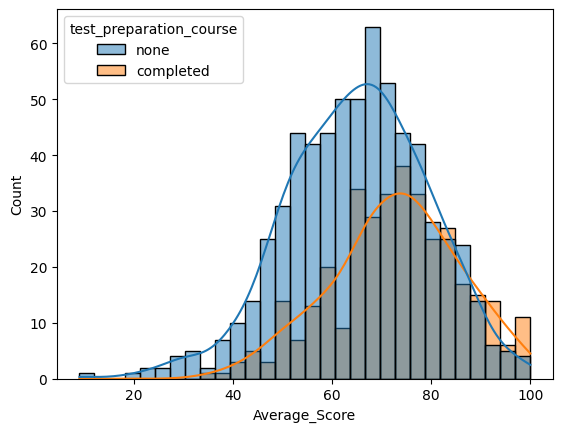

In [49]:
sb.histplot(data = df , x ='Average_Score' , bins = 30 , kde = True , hue = 'test_preparation_course')


<Axes: xlabel='Average_Score', ylabel='Count'>

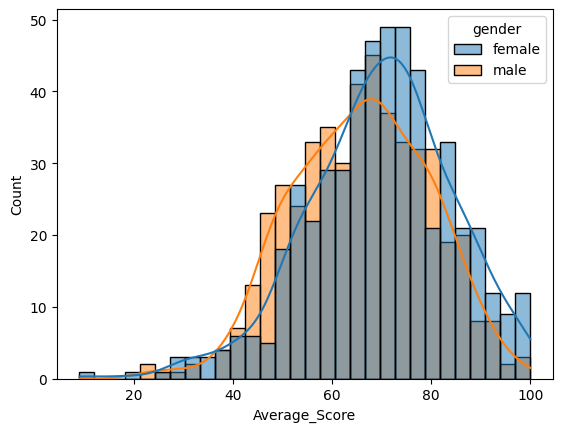

In [50]:
sb.histplot(data = df , x = 'Average_Score' , bins = 30 , kde = True , hue = 'gender')

### `Insights`: 
1. Female students tend to perform well than male students. 
2. Students who complete test preparation course tend to perform higher.

<Axes: xlabel='Average_Score', ylabel='Count'>

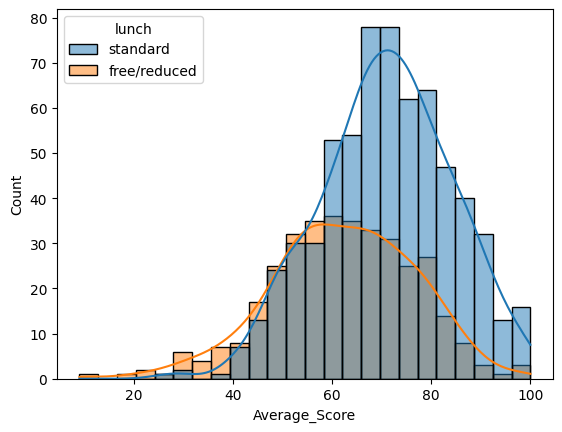

In [22]:
sb.histplot(data = df , x = 'Average_Score' , kde = True , hue = 'lunch')

### `Insight`: Standard lunch help the students perform well 

<Axes: xlabel='Average_Score', ylabel='Count'>

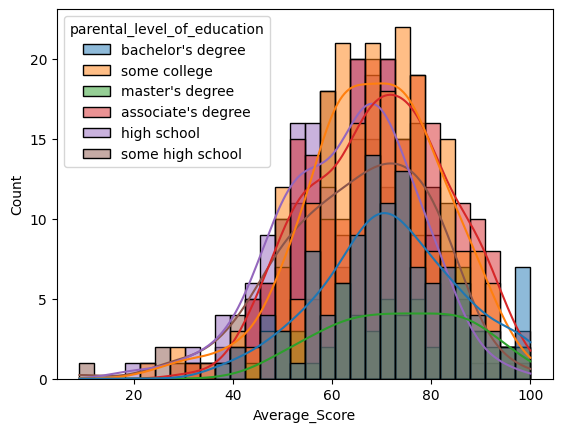

In [41]:
sb.histplot(data = df , x = 'Average_Score' , bins = 30 , kde = True , hue = 'parental_level_of_education')

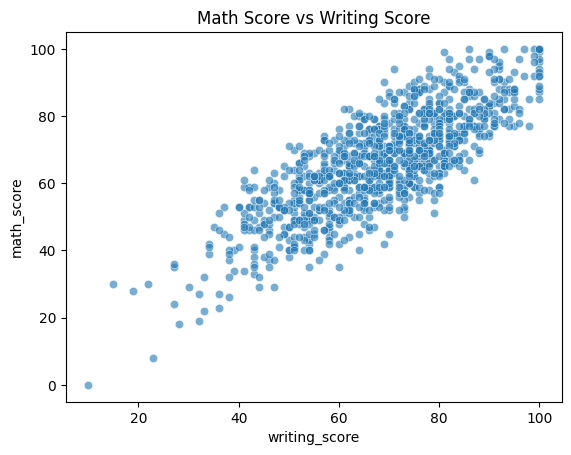

In [47]:
sb.scatterplot(data=df, x="writing_score", y="math_score", alpha=0.6)
mat.title("Math Score vs Writing Score")
mat.show()

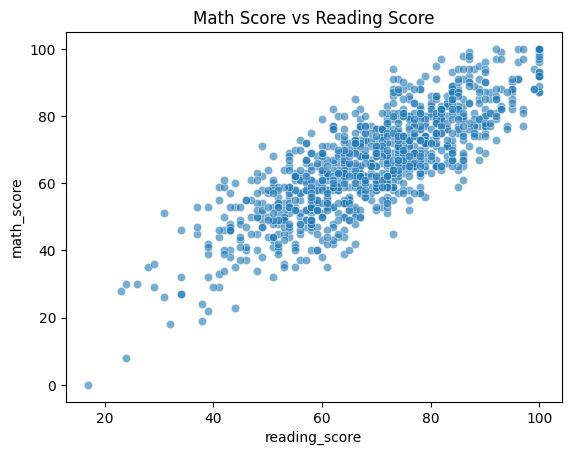

In [48]:
sb.scatterplot(data=df, x="reading_score", y="math_score", alpha=0.6)
mat.title("Math Score vs Reading Score")
mat.show()

### `Insights` - Students who perform well in reading and writing tend to also perform in math. 

# Data Transformation

In [24]:
# num_features

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

## Split the data

In [27]:
# Separate features and target
X = df.drop(columns=["math_score"])   
Y = df["math_score"]

#### `total_score is the predictor variable`

## Split the data inot Train and Test

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

categorical_features = ["gender", "race_ethnicity", "parental_level_of_education", "lunch", "test_preparation_course"]
numerical_features = ["reading_score", "writing_score"]

# Preprocessor (One Hot Encoder for categorical, Standard Scaling for numerical)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features) ,
        ("num", StandardScaler(), numerical_features)
    ]
)

# pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])



## Train using pipeline

In [30]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'race_ethnicity',
                                                   'parental_level_of_education',
                                                   'lunch',
                                                   'test_preparation_course']),
                                                 ('num', StandardScaler(),
                                                  ['reading_score',
                                                   'writing_score'])])),
                ('model', LinearRegression())])

## Predict

In [31]:

y_pred = pipeline.predict(X_test)

## Evaluate Using Metrics

In [32]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [33]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model Evaluation Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Model Evaluation Metrics:
R² Score: 0.8759
Mean Absolute Error (MAE): 4.4183
Mean Squared Error (MSE): 30.8866
Root Mean Squared Error (RMSE): 5.5576


## Save Model

In [ ]:
# import joblib
# model = joblib.load("student_score_model.pkl")

In [ ]:

import pickle

In [34]:
pickle.dump(pipeline, open("student_score_model.pkl" , "wb"))

In [35]:
with open('student_score_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

sample = X_test.iloc[0:1]   # Using first row as example
print("Prediction:", loaded_model.predict(sample))

Prediction: [76.511652]


In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
scores = cross_val_score(loaded_model, X, Y, cv=5, scoring='r2')
print("Cross-validated R²:", scores.mean())

Cross-validated R²: 0.8717997497009925
